## Introduction

Whole banking sector is run on borrowing and lending. Money is borrowed from depositors and other sources and that borrowed money is used to lend to the borrowers who need it.

So to evaluate the creditworthiness of a borrower during the lending process banks carry out credit analysis that helps in risk assesment and getting an overall view of applicant's financial standing by analyzing the credit history.

- It helps in maintaining profitability.
- Minimizes the risk of fraudelent activities.
- Enhances the customer experience.


### Importance of approval of CC in today's world:

Number of credit card applications are increasing largely. Banks and other financial institution face the challenge of efficiently processing these application while ensuring that they only approve credit cards for qualified applicants.

This project aimed to develop an predictive model that is efficient and can help banks and financial institutions stremline their credit card approval process, reducing the risk of fraud and ultimetly increase profitability while ensuring fair and responsible lending practices.


## Overview of the dataset

Working on `Credit_card_dataset.csv` dataset contains **18 Features** and **1548 Observations**. All the observation contains personal, financial and employment data of an individual.
The **Target variable is binary** and is stored in `CC_Label.csv` file.

All the features except 6 numeric features are categorical. We explore the dataset further in our analysis.

The target variable, the rejected applications are in **extreme minority** which indicates **class imbalance** and the prediction of these minority classes is one of the main challenges because Machine Learning algorithm usually work best when the diffrent classes contained in the dataset are more or less equally present. If there are few cases of rejected applications then there's little data to learn hoe to identify them.

Let's explore the existing features of the dataset.


### Features Details:

### 1.  `Credit_card_dataset.csv`
| Variables | Description |
| :--- | :--- |
| **Ind_ID** | Client ID |
| **Gender** | Gender information |
| **Car_owner** | Have car or not |
| **Property_owner** | Have property or not |
| **Children** | How many children client have |
| **Annual_income** | Annual income of client |
| **Type_Income** | Income type | 
| **Education** | Education of client |
| **Marital_status** | Client is married or unmarried |
| **Housing_type** | Living style |
| **Birthday_count** | Use backward count from current day (0), -1 means yesterday. |
| **Employed_days** | Employment start date. Use backward count from current day (0). Positive value means individual is currently unemployed. |
| **Mobile_phone** | Own mobile phone |
| **Work_phone** | Have any work phone |
| **Phone** | Any phone number |
| **EMAIL_ID** | Email id |
| **Type_Occupation** | Occupation of client |
| **Family_Members** | How many family members client have |


### 2. `CC_Label.csv`
| Variables | Description |
| :--- | :--- |
| **Ind_ID** | The joining key between application data and credit status data, same as Ind_ID |
| **Label** | 0 is application approved and 1 is application rejected. |



Our project is divided into several categories covering the data science process in detail. Ctegories are as follows:

    1. Understand the data.
    2. EDA and Data Preprocessing.
    3. Feature Engineering.
    4. Model Building and Performance Evaluation.

## 1. Understanding the data

### Importing Required Libraries

In [192]:
# Libraries for analysis
import numpy as np
import pandas as pd

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Libraries for model building and performance evaluation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Allows charts to appear in the notebook
%matplotlib inline

### Loading and Merging the datasets

In [193]:
# Importing the dataset
credit = pd.read_csv("Credit_card_dataset.csv")

# Importing the target variable
target = pd.read_csv("CC_Label.csv")

# First 5 rows of dataset
credit.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [194]:
credit.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [195]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [196]:
# First 5 rows of target dataset
target.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [197]:
# Merging the datasets on common column
credit_card = credit.merge(target, how ='inner', on='Ind_ID')

# Making a copy of dataset
df = credit_card.copy(deep=True)


# First 5 rows of dataset
df.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Basic Exploration

In [198]:
# Shape of the dataset
n,m = df.shape
print(f'The Dataset has {n} rows and {m} columns')

The Dataset has 1548 rows and 19 columns


In [199]:
# Checking the NULL records
null_val = pd.DataFrame(df.isnull().sum(), columns =["No. of Null records"])
null_per = pd.DataFrame(df.isnull().mean()*100, columns= ['Percent of Null records'])
null_records = pd.concat([null_val, null_per], axis = 1).sort_values(by= 'Percent of Null records', ascending = False)
null_records


,No. of Null records,Percent of Null records
Type_Occupation,488,31.524548
Annual_income,23,1.485788
Birthday_count,22,1.421189
GENDER,7,0.452196
Ind_ID,0,0.000000
Employed_days,0,0.000000
Family_Members,0,0.000000
EMAIL_ID,0,0.000000
Phone,0,0.000000
Work_Phone,0,0.000000


We have some null records in the dataset. Let's check for unique values so that their should not be any unecessary value present in the dataset. May be blank or special character or any other extream value  can be present in the dataset.

In [200]:
# Number of unique categories
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Property_Owner        2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [201]:
# Checking unique values in each column
for i in df.columns:
    print(f'{i}: {df[i].unique()}','\n')

Ind_ID: [5008827 5009744 5009746 ... 5115992 5118219 5053790] 

GENDER: ['M' 'F' nan] 

Car_Owner: ['Y' 'N'] 

Property_Owner: ['Y' 'N'] 

CHILDREN: [ 0  1  2  4  3 14] 

Annual_income: [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    3

From above analysis we can state that:
- No **special character** available in the records
- **Extream positive values** are present in `Employed_days` which are varying from the regular pattern, we have to deal with this 

In [202]:
# Checking for duplicates, if any
df.duplicated().sum()


0

In [203]:
# Brief description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

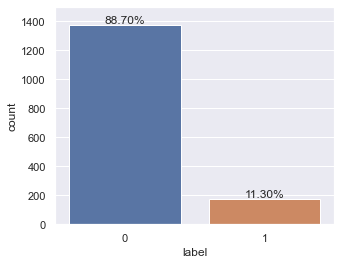

In [204]:
# Count of occurances of approved and rejected applications
sns.set(rc= {'figure.figsize':  (5,4)})
ax = sns.countplot(x = df['label'])

for i in ax.patches:
    percentage = '{:.2f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+10
    ax.annotate(percentage, (x, y), ha='center')

plt.ylim((0,1500))
plt.show()

From the above plot we can observ imbalance in the data where maximum number applicants are of whose application is approved. This need to corrected using sampling techniques before feeding into predictive models. 

### Observations:

1. The dataset has a total of **18 features** out of which **6 are numerical** and the rest **12 are categorical**.
2. From 6 numeric features **3 are continuous** (`Annual_income`, `Birthday_count`, `Employed_days`) and **3 are discrete** (`Ind_ID`, `CHILDREN`,`Family_Members`).
3. From 12 categorical features except `EDUCATION`(Ordinal) all other are Nominal variables.
4. **Four features** `Gender`, `Annual_income`, `Birthday_count` and `Occupation` have **Null records** out of which `Type_Occupation` have highest number of NULL records (around 31.5%) while other records have less than 1.5% null records. 
5. Target variable is binary and is **highly imbalanced** have **88.7%** data belongs to class 0(Approved Application) and **11.3%** data belongs to class 1(Rejected Application).

### Performing Exploratory Data Analysis and Data Processing.

In [205]:
# Making the column cases uniform
df.columns = df.columns.str.lower()
df.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Removing Unnecessary columns

We have 1 category in `mobile_phone` column. We can delete it as it's not help in predicting O/P. 

In [206]:
# Dropping the unncessary columns
df.drop(columns = ['mobile_phone'], inplace = True)

In [207]:
# Setting the index 
df.set_index('ind_id', drop =True, inplace = True)

In [208]:
# Converting the datatypes of categorical columns to 'category' for performance optimization
cols = ['gender','car_owner','property_owner','type_income','education','marital_status','housing_type',
        'work_phone','phone','email_id', 'type_occupation', 'label']
df[cols] = df[cols].astype('category')
df.dtypes


gender             category
car_owner          category
property_owner     category
children              int64
annual_income       float64
type_income        category
education          category
marital_status     category
housing_type       category
birthday_count      float64
employed_days         int64
work_phone         category
phone              category
email_id           category
type_occupation    category
family_members        int64
label              category
dtype: object

<AxesSubplot:>

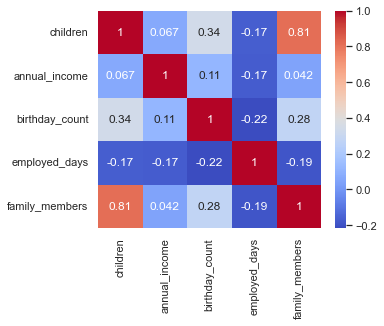

In [209]:
# Correlation matrix for Spearman's Rank Correlation
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'coolwarm')

Here we can observe the **strong correlation between `children` and `family_members`**.

### Univariate Analysis

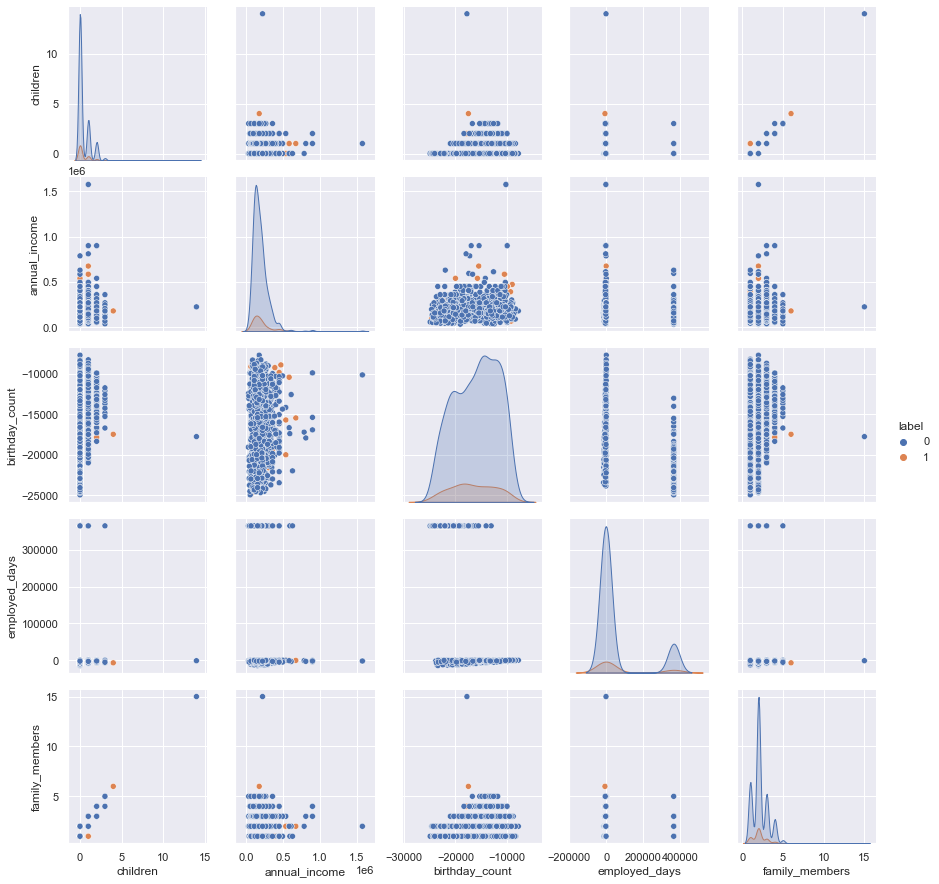

In [210]:
# Setting the plot size
sns.set(rc={'figure.figsize':(20, 20)}, style = 'darkgrid')

# Overall pattern of data
sns.pairplot(df, diag_kind = 'kde', hue = 'label')

**Observations:**
1. Scater plots mostly shows randomness. We can see the linear relationship between family_members and number of children, which is obvious because if number of children increases then family size also increase.

2. The distribution of `Annual Income` is right skewed, `birthday_count` seems to be normally distributed which we will analyze further and `employed_days` seems to be right skewed and bimodal.

### Analysis of Categorical data

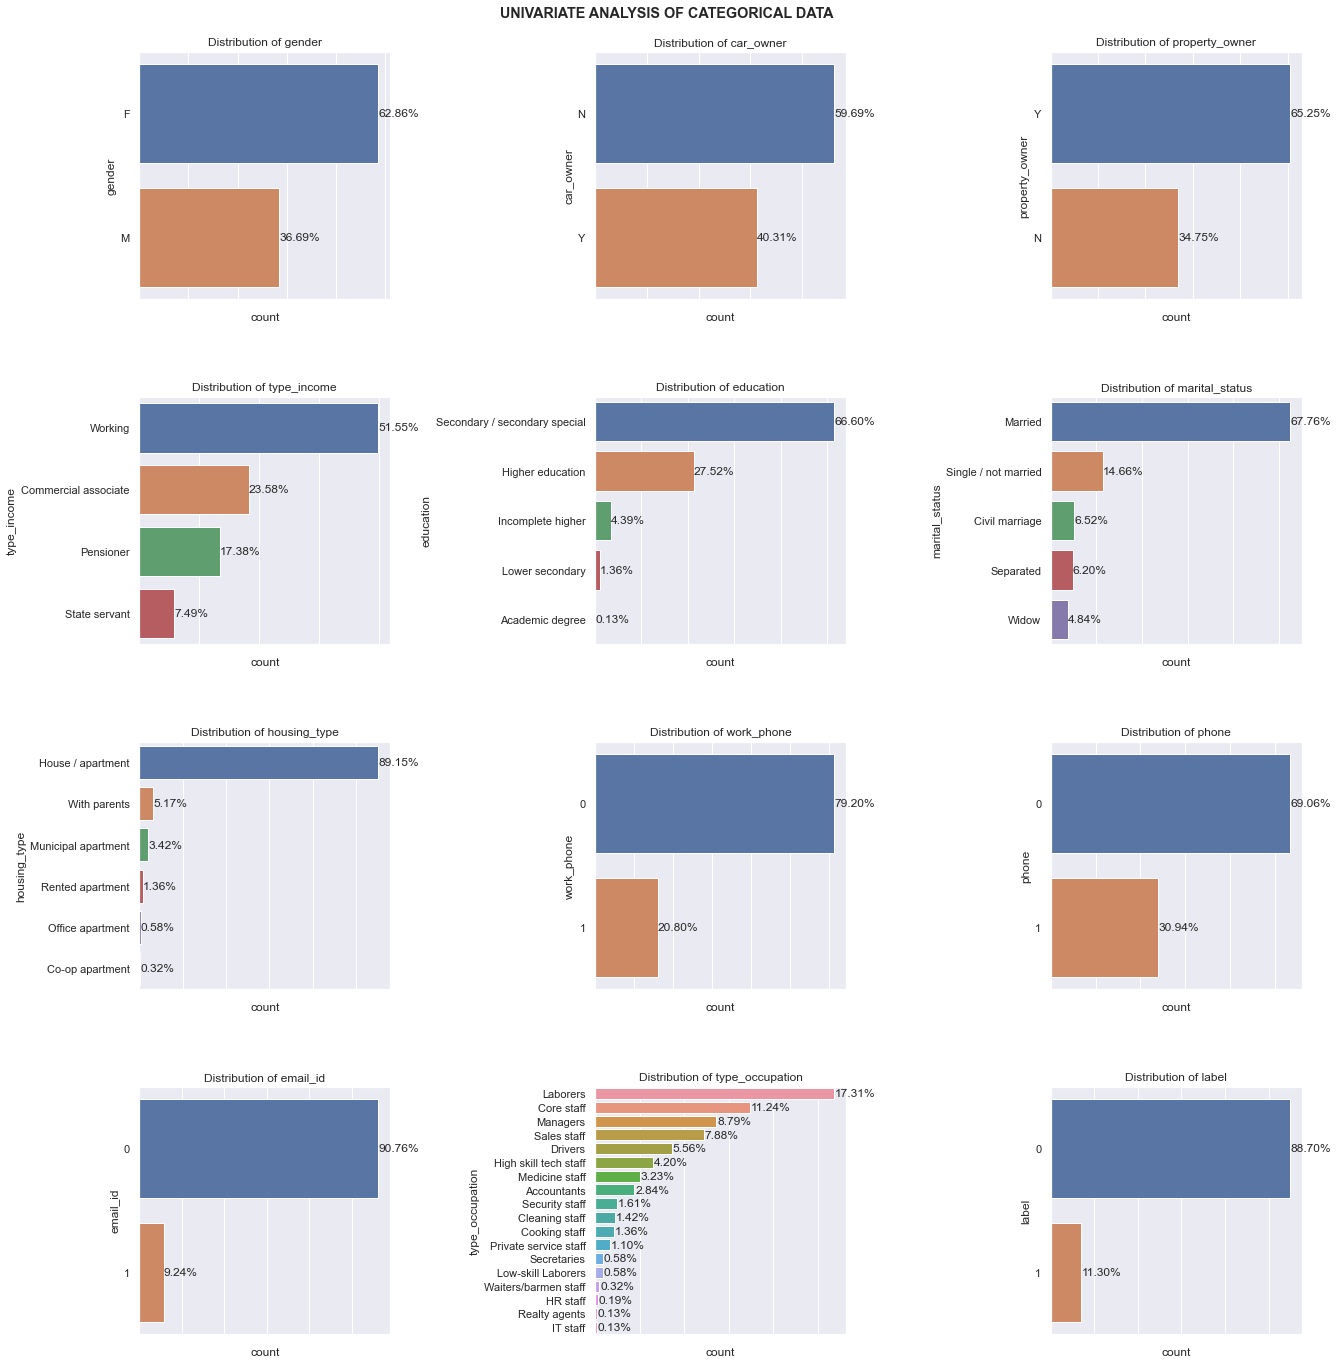

In [211]:
# Univariate analysis of Categorical Columns

fig, axes = plt.subplots(4,3) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0

for i in df.dtypes.items():
    if i[1] == 'category':
        ax = sns.countplot(y=df[i[0]], ax = axes[j], order = df[i[0]].value_counts().index)
        j+=1
        ax.set_xticklabels(ax.get_xticklabels())
        ax.set_title(f"Distribution of {i[0]}")
        
        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')
    else:
        pass

fig.tight_layout(w_pad=0.5, pad = 5)
fig.suptitle("UNIVARIATE ANALYSIS OF CATEGORICAL DATA", fontweight = 'bold')
plt.show()

**Observations:**
- From the univariate analysis got the observation as:
		1) We have 63% female and 37% male.
		2) Almost 60% individuals does not own a car.
		3) Almost 65% individuals are property owners.
		4) 51% income comes from working, 23% are commercial associates, 17% are pensioner, 7% are state servant.
		5) 67% peresived secondary education, 27% done higher education, 5% people have not completed higher education and only 0.13% have an academic degree.
		6) For marrital status 68% are married,15% are unmarried, 6.5% have performed civil marriage and 11% are separeted or widows. Mejority people have low educational background
		7) About 89% have their own houses/apartment, 5% of peoples live with there family, 4% living in municipal apartments and rest are live in office apartmentor co-op apartment
		8) Maximum people neither have a work phone nor a phone. However, everyone owns a mobile phone.
		9) 91% people don not have any any e-mail id.
		10) For the occupation maximum 18% are laborers, 11% are corporate employee, 9% are managers and remaining are HR staff,reality agents, It staff and they are least in numbers 

### Analysis of Numerical Data

### Discrete Numerical Data

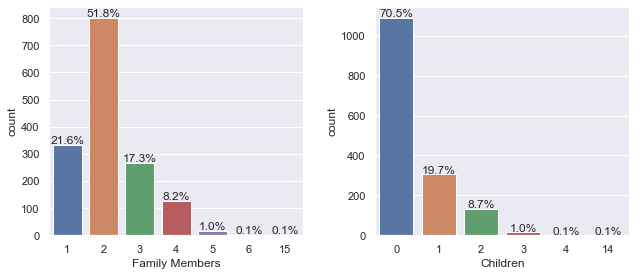

In [212]:
# Setting the figure size
plt.figure(figsize = (9,4))

#Plotting graphs in subplots
plt.subplot(121)
ax = sns.countplot(x = df['family_members'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Family Members")

plt.subplot(122)
ax = sns.countplot(x = df['children'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Children")

plt.tight_layout(w_pad = 2)

**Observations:**
1. 52% individual have 2 family members rest are 1 or 3 or have 4 peoples in family.
2.About 71% of people dont have any child.

### Continuous Numerical Data

- From the pairplot we plotted earier we get to know that there has some extream values in it.	

In [213]:
# Checking value counts to understand the extreme values
df['employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: employed_days, Length: 956, dtype: int64

- Then checking value counts to uderstand extreme values. We get to observ that `employed_days` variable has extrem positive values which are affecting the reguar pattern. Positive values indicate that the individual is unemployed so we can simply replace those values with +1 which will help in preservng the pattern of the data.

In [214]:
# Replacing extreme values of employed days to 1
df.loc[df['employed_days']>0, ['employed_days']] = 1

<AxesSubplot:xlabel='employed_days', ylabel='Count'>

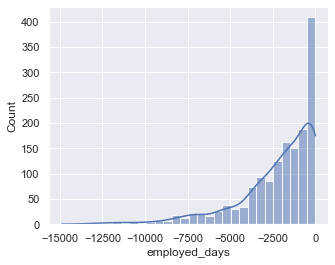

In [215]:
# Checking the distrbution after replacing extreme values
plt.figure(figsize = (5,4))
sns.histplot(x = df['employed_days'], bins = 30, kde = True)

- The plot is looking better now but still certain outliers are there which we will deal later.

- While looking `employed_days` and `birth_count` columns they are justifying the work experiancce and age of an individual respectively. So tryed to convert these columns which will help in clear understanding and ease in analysis.

In [216]:
# Creating new columns by extracting data from other feartures
df['work_experience'] = np.ceil(-df['employed_days'] / 365.25) #Converting days to years

df['age'] = np.ceil(-df['birthday_count'] / 365.25)

# Checking the dataset
df.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,NaN,2,1,-0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1,2.0,NaN
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1,2.0,38.0


Now, we have actually performed a part feature engineering by extracting data from other features.

Let's check the difference in skewness of older and new variables

In [217]:
# Skewness values of original columns and Extracted columns

print(f"Skewness of Employed_Days\t:{df['employed_days'].skew()}")
print(f"Skewness of Work Experience\t:{df['work_experience'].skew()}")
print(f"Skewness of Birthday_Count\t:{df['birthday_count'].skew()}")
print(f"Skewness of Age\t\t\t:{df['age'].skew()}")

Skewness of Employed_Days	:-1.7296023658309658
Skewness of Work Experience	:1.661916218120766
Skewness of Birthday_Count	:-0.17108666821145055
Skewness of Age			:0.17159161366119227


- Skewness does not show any diffrence, just magnitude is changed.
- As we have created new columns we can delete the older ones so that we can avoid multicollinearity.

In [218]:
# dropping the column as we have created another from existing table
df.drop(columns = ['birthday_count', 'employed_days'], inplace = True) 
#droping bithday_count and employed_days as we have created age column from that 

In [219]:
df.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,type_occupation,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,NaN,2,1,-0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,2.0,NaN
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,2.0,38.0


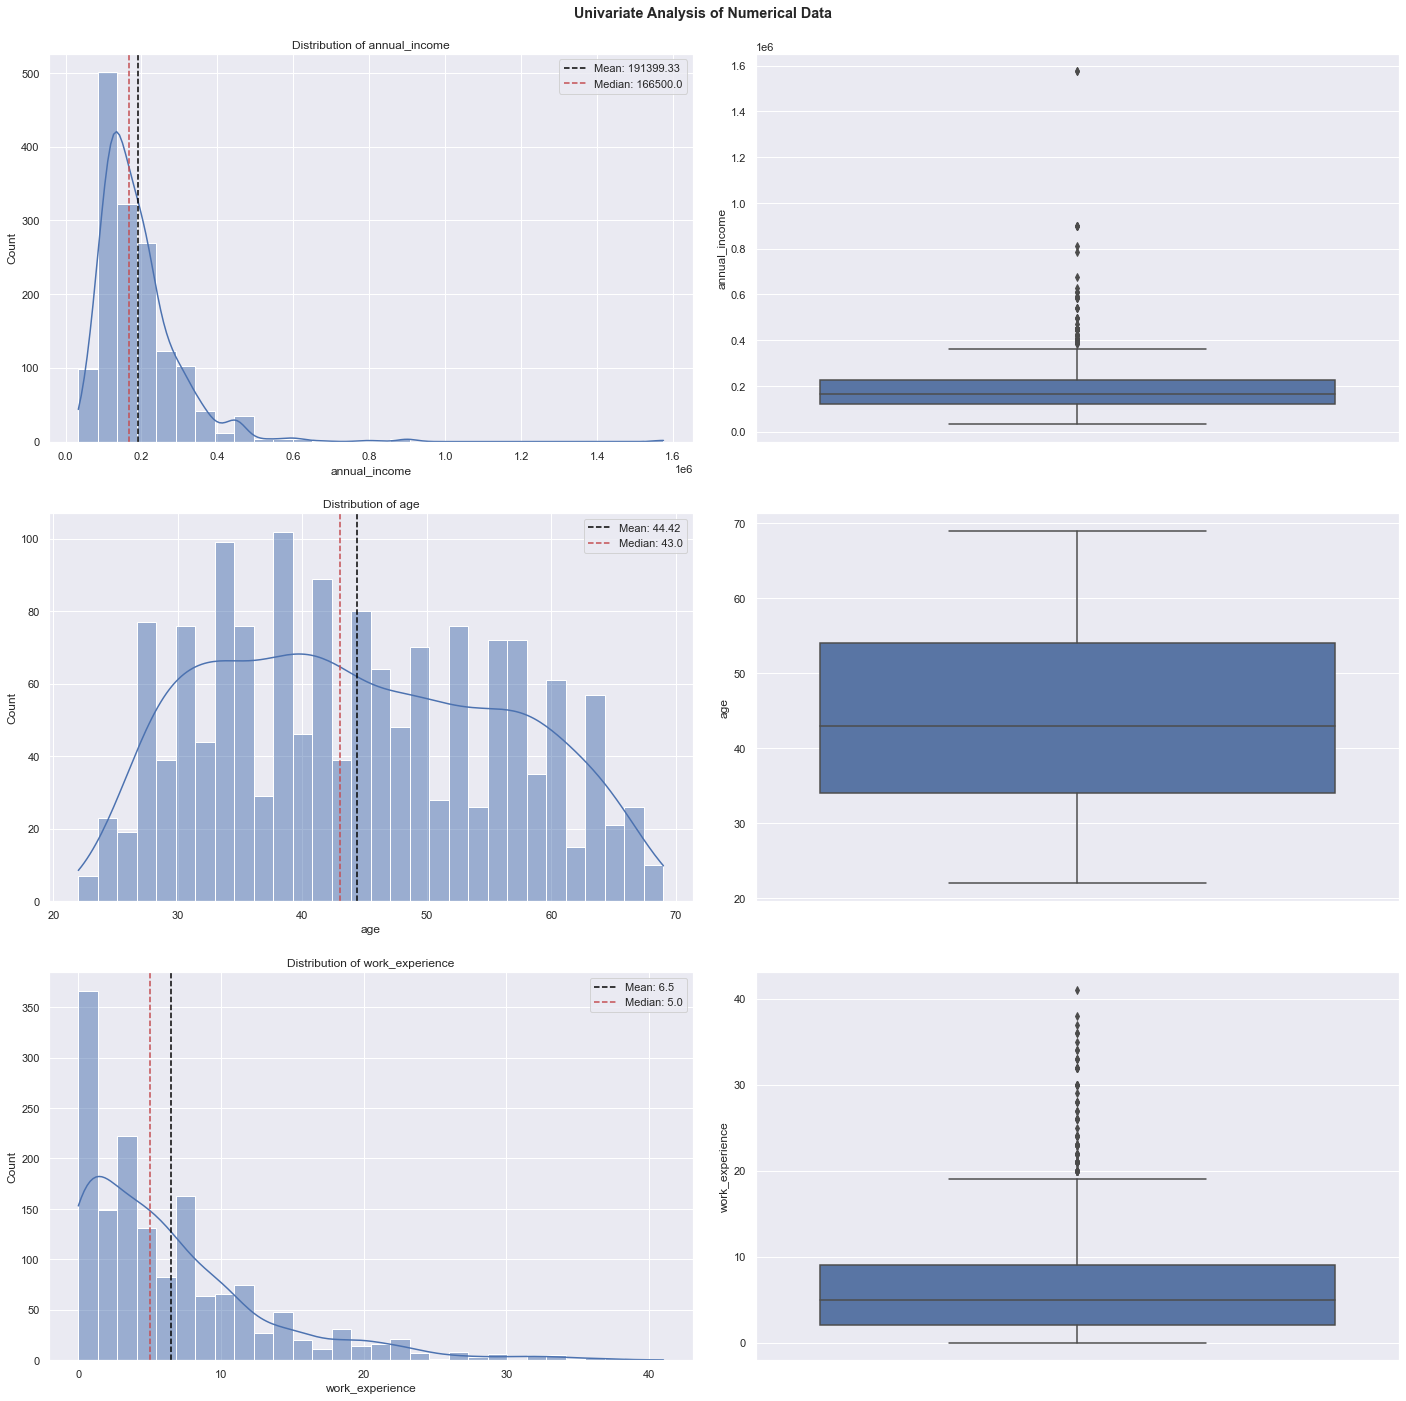

In [220]:
cols = ['annual_income','age', 'work_experience']

fig, axes = plt.subplots(3,2) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0
k = 1

for i in df[cols].dtypes.items():
    ax = sns.histplot(x=df[i[0]], ax = axes[j], kde = True, bins = 30)
    ax.axvline(x = df[i[0]].mean(), c= 'black', ls = '--', label =f"Mean: {round(df[i[0]].mean(), 2)}")
    ax.axvline(x = df[i[0]].median(), c= 'r', ls = '--', label =f"Median: {round(df[i[0]].median(), 2)}")
    ax.set_title(f"Distribution of {i[0]}")
    ax.legend()
    
    j+=2

for i in df[cols].dtypes.items():
    ax= sns.boxplot(y = df[i[0]], ax = axes[k])
    k+=2
    
plt.suptitle("Univariate Analysis of Numerical Data", fontweight ='bold')
plt.tight_layout(w_pad = 2, pad = 2)
plt.show()

`Observation:`

Creating the subplots for 'annual_income','age', 'work_experience'.

- From the plot `annual_income` and `work_experience` is right 	skewed have +3.92 and +1.66 respectively. We need to apply some transformations to make the distribution normal befour 	modeling.

- From work experience distribution it can be seen that most of the individuals are unemployed and most have less than 10 year 	experiance.

- Age column is almost normally distributed and have no outliers.

### Bivariate and Multi-variate Analysis

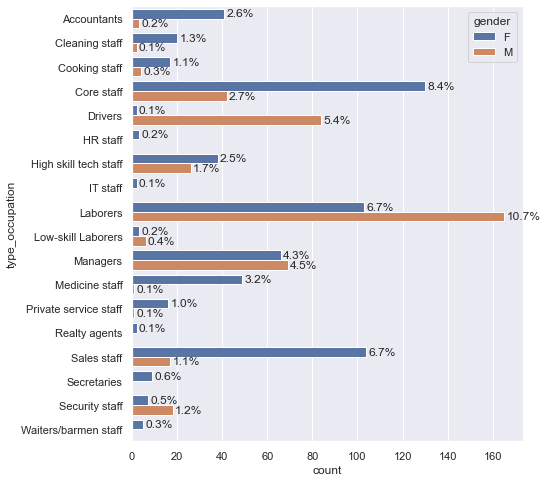

In [221]:
# Checking the distrubution of occupation type by gender

plt.figure(figsize = (7, 8)) # Setting the figure size
ax = sns.countplot(y = df['type_occupation'], hue = df['gender'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

`Observations:`

Checked occupation distribution by gender:

- Laborers, low-skilled laborers, drivers, security staff have higher males compared to females also there are slightly greater male manageer than female manager.
	
- In core staff job female presence is more than males.

- There are equal no of female in sales staff and Laborers.

- Sales staff has a high female than male. No of female in it is six time more than male.

- There seen a zero or very less male involment in occupation like Secretaries, Waiters/Barmen Staff, Reality Agents, Private Service Staff, Medicine Staff, IT Staff, HR Staff, Cleaning Staff, Accountants

- Females are present in all type of occupations.

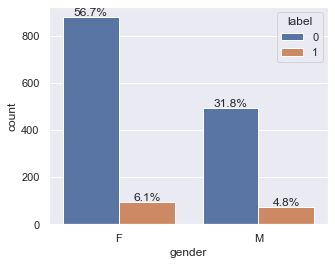

In [222]:
# Checking the distribution of gender by label
sns.set(rc = {'figure.figsize': (5,4)}) # Setting the figure size
ax = sns.countplot(x= df['gender'], hue = df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

`Observations:`
- Female has less approved application than male.
- As no of female is higher in the data hence the no of application accepted are higher in female case.

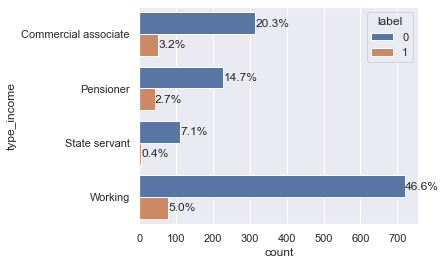

In [223]:
# Checking the distribution of type_income by label
ax = sns.countplot(y= df['type_income'], hue= df['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df['type_income']))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

plt.show()

`Observations:`

Cheking distribution of type_income by label:
		
- Most of the working professional are Working hence there acceptance and rejection rate is highest

- State seervant category has the highest accepted to rejected application ratio.

- Pensioner category had the lowest accepted to reject application ratio.


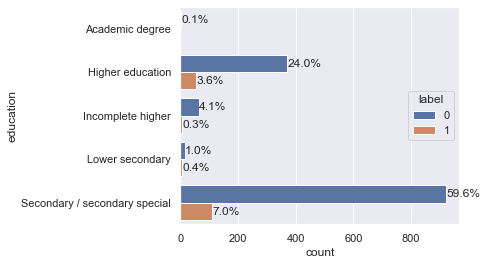

In [224]:
# Checking the distribution of education by label
ax = sns.countplot(y= df['education'], hue= df['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

`Observations:`

Cheking distribution of Education by label:
	
- No application for academic degree holders was rejected

- For lower secondary education have lowest accepted to rejected application ratio that means that if a person is have lower secondary education background then higher chances of application being rejected.

- Most of the applications were rejected for secondary education category which is certainly due to many reason.


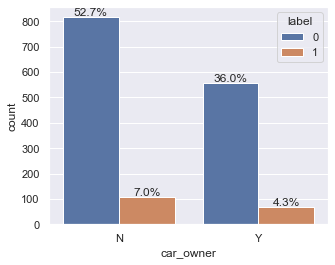

In [225]:
# Checking the distribution of car_owner by label
ax= sns.countplot(x= df['car_owner'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

`Observations:`


Cheking distribution of Car_owner by label:

- Persons who dont own a car has higher rejection rate.
	
- Persons who own a car has higher chances of application to be accepted.

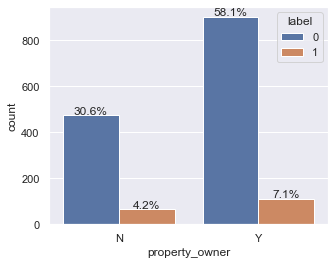

In [226]:
# Checking the distribution of property_owner by label
ax = sns.countplot(x= df['property_owner'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

`Observations:`

Cheking distribution of property_owner by label:
		
- Persons owning property have higher rejection rate.
			
- The accepted to rejected application ratio has higher for those who own property.

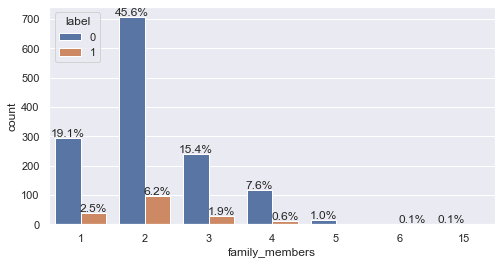

In [227]:
# Checking the distribution of family_members by label
plt.figure(figsize = (8,4)) # Setting the figure size
ax= sns.countplot(x= df['family_members'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

`Observations:`


Cheking distribution of family_member by label:

- No clear indication can be made for the reason of accepted and rejected applications from the graph.

- Individuals living in a family of 2 members have highest rejected applications.

- All applications were accepted for a family of 5 members.

- Individuals having a family of 4 members have higher accepted to rejected applications ratio compaered to other major catergory of members.

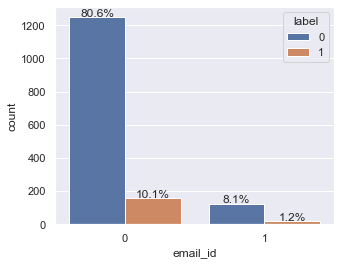

In [228]:
# Checking the distribution of email_id by label
ax = sns.countplot(x= df['email_id'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

`Observations:`

Cheking distribution of email_id by label:
- Most of the individuals do not have email. Rejection applications are also high for those who dont have email.

- People not having an email have higher accepted to rejected applications ratio compaired to those who have email.

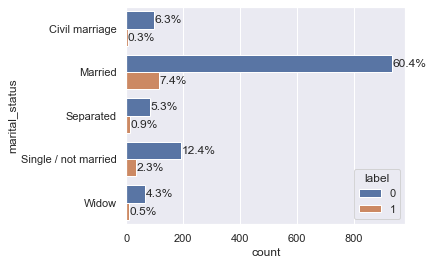

In [229]:
# Checking the distribution of marital_status by label
ax = sns.countplot(y= df['marital_status'], hue= df['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')
    
plt.show()

`Observations:`


Cheking distribution of marital_status by label:

- Married individuals have highest applications. 

- Individuals having civil marriage have higher accepted to rejected ratio. This indicates that people having civil marriage have highest chances of approval of credit card application.	

- Single individuals have lowest accepted to rejected application ratio. 

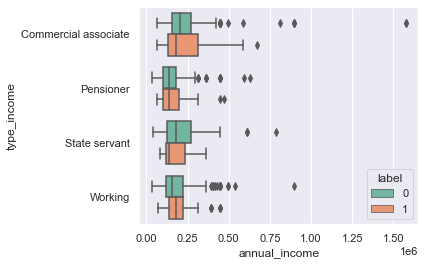

In [230]:
# Distribution of annual income by category for each label
sns.boxplot(x= df['annual_income'], y= df['type_income'], hue = df['label'], palette = 'Set2')
plt.show()

`Observations:`

Cheking distribution of annual income by category for each label:

- In the distribution of annual incomes of accepted and rejected application does not have much variation.

- commercial associates have higher annual income compared to all other categories. They also have more extream outliers.

- The median income of rejected applicats seems to be more or less same as the median income of  accepted applicants of the same category. State servants whose applications were rejected have lower annual income than those of accepted applicants of the same category.


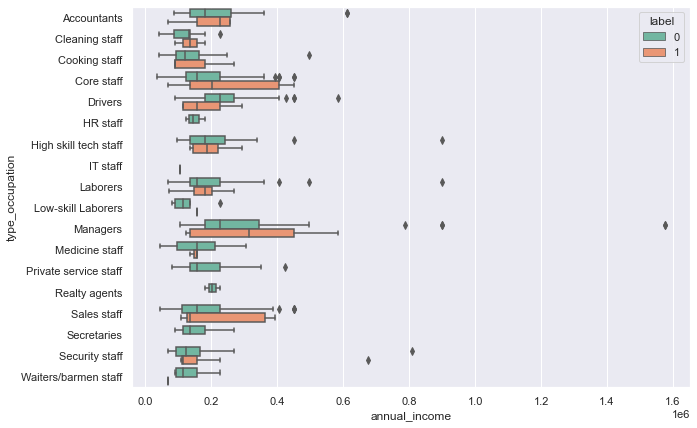

In [231]:
# Comparison of annual income by occupation type for each label
plt.figure(figsize = (10,7))
sns.boxplot(x= df['annual_income'], y= df['type_occupation'], hue = df['label'], palette = 'Set2')
plt.show()

`Observations:`



Cheking distribution of annual income by occupation type for each label:
	
- Extreme outliers can also be seen for annual income of Managers.

- Managers having rejected credit card applications have highest median annual income and more variation can be seen in the distribution.

- There is no clear indication that an application got rejected due to lower annual income.

- In most of the scenarios the median annual income of rejected applications are higher or nearly same than those of accepted applications.


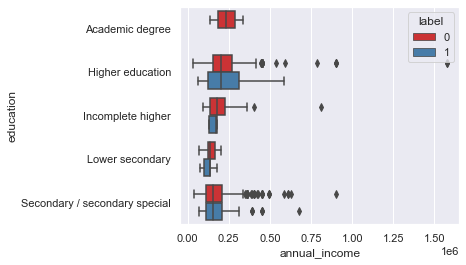

In [232]:
# Distribution of annual income by education for each label
sns.boxplot(x= df['annual_income'], y= df['education'], hue = df['label'], palette = 'Set1')
plt.show()

`Observations:`


Cheking distribution of annual income by education for each label:

- Except Lower secondary education all other categories have almost same median annual income for accepted and rejected applications.

- Maximum outliers can be seen in Secondary/secondary special education category.

- No applications were rejected for academic degree holders.

- Rejected applications in lower secondary education category have least median annual income.


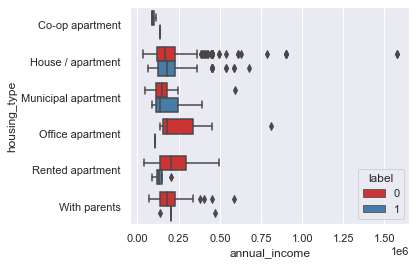

In [233]:
# Distribution of annual income by housing type for each label
sns.boxplot(x= df['annual_income'], y= df['housing_type'], hue = df['label'], palette = 'Set1')
plt.show()

`Observations:`


Cheking distribution of annual income by housing type for 	each label:

- From above plot we can observe that there is no pattern in the annual income of accepted and rejected applications for each category of housing type.

- More extreme outliers can be seen in the House/apartment category of accepted applications.

## Handling Missing Values

We will start dealing with the missing values by first **splitting the dataset in order to prevent data leakage**.

#### Overview of Missing Values

In [234]:
# Percentage of missing values
df.isnull().mean()*100

gender              0.452196
car_owner           0.000000
property_owner      0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
work_phone          0.000000
phone               0.000000
email_id            0.000000
type_occupation    31.524548
family_members      0.000000
label               0.000000
work_experience     0.000000
age                 1.421189
dtype: float64

<AxesSubplot:>

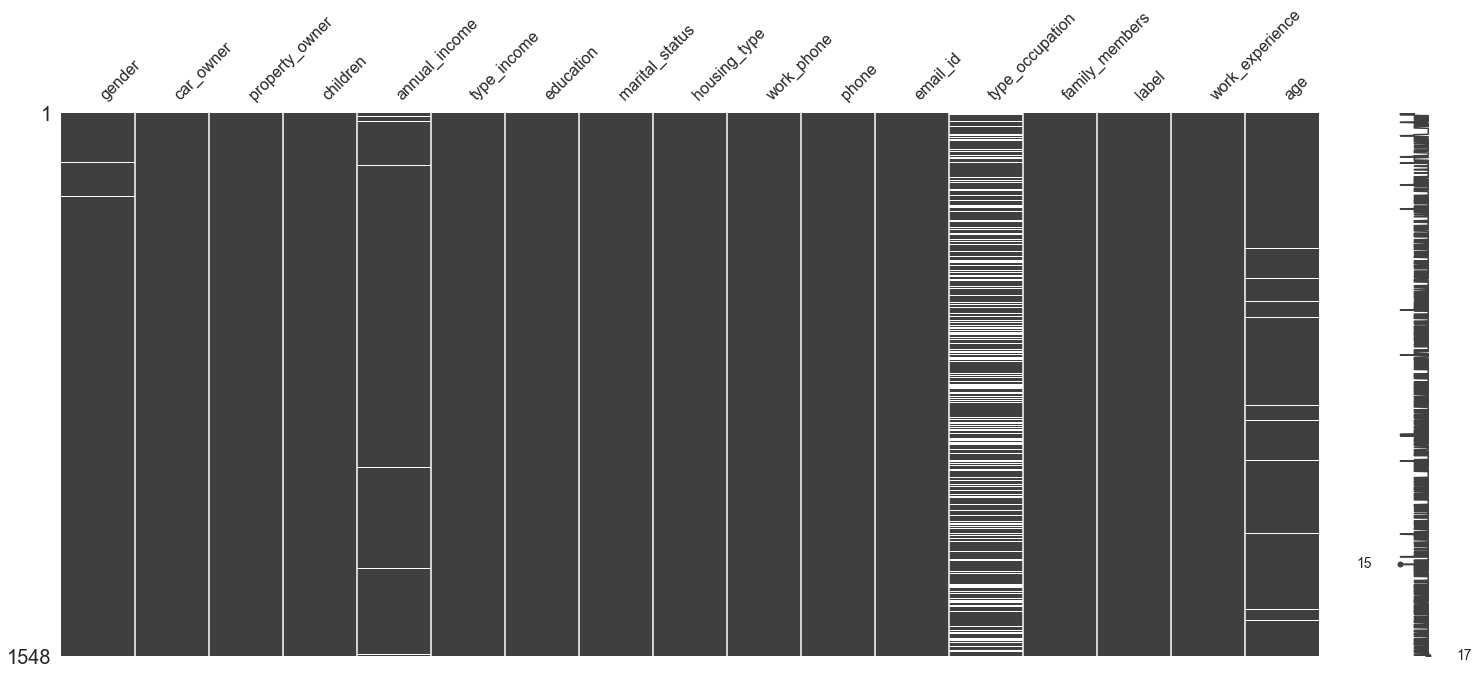

In [235]:
# Shows the location of missing values
msno.matrix(df)

<AxesSubplot:>

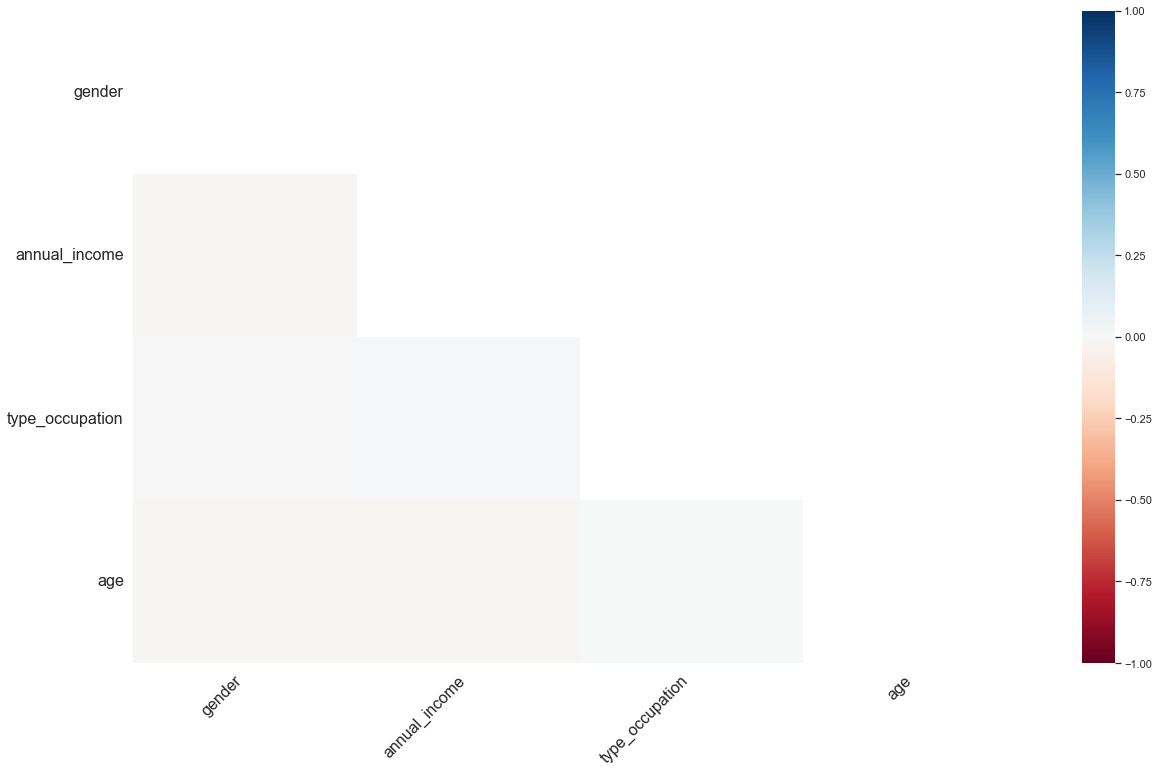

In [236]:
# Shows relation between missing values
msno.heatmap(df)

The above heatmap shows that there is no correlation between the missing values. So, the data is **Missing Completely At Random (MCAR)**.

**Missing values in column `type_occupations` are very high so it's better to remove this column from our analysis.**

In [237]:
# Deleting the column having max null values
df.drop(columns = 'type_occupation', inplace = True)

In [238]:
df.head()
# dropped column type occupation.

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,label,work_experience,age
ind_id,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,1,-0.0,52.0
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,NaN
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0


In [239]:
# Splitting the dataset to avoid data leakage
X = df.drop(columns = 'label')
y = df['label']

In [240]:
# Splitting training and testing dataset, considering 30% data for testing with random state as 108 for reproducible results
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 108, stratify = y)

In [241]:
print(f"Percentage of missing data in Training dataset:\n{x_train.isnull().mean()*100}\n\n")
print(f"Percentage of missing data in Testing dataset:\n{x_test.isnull().mean()*100}")

Percentage of missing data in Training dataset:
gender             0.461681
car_owner          0.000000
property_owner     0.000000
children           0.000000
annual_income      1.569714
type_income        0.000000
education          0.000000
marital_status     0.000000
housing_type       0.000000
work_phone         0.000000
phone              0.000000
email_id           0.000000
family_members     0.000000
work_experience    0.000000
age                1.569714
dtype: float64


Percentage of missing data in Testing dataset:
gender             0.430108
car_owner          0.000000
property_owner     0.000000
children           0.000000
annual_income      1.290323
type_income        0.000000
education          0.000000
marital_status     0.000000
housing_type       0.000000
work_phone         0.000000
phone              0.000000
email_id           0.000000
family_members     0.000000
work_experience    0.000000
age                1.075269
dtype: float64


- From that we get to know that missing data in all the columns 	is less than 2% so we can use simple imputation technique.

- We will impute:
		- gender with mode
		- annual_income with median value because it is right-skewed.
		- age with mean since it is normally distributed.


## Imputation in Training Data

In [242]:
# Imputing gender column with Most frequent Categories
x_train['gender'].fillna(x_train['gender'].mode()[0], inplace = True)

In [243]:
# Imputing annual_income column with its median value
x_train['annual_income'].fillna(round(x_train['annual_income'].median()), inplace = True)

In [244]:
# Imputing age column with its mean
x_train['age'].fillna(round(x_train['age'].mean()), inplace = True)

In [245]:
# Checking the dataset
x_train.isnull().sum()

gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
work_phone         0
phone              0
email_id           0
family_members     0
work_experience    0
age                0
dtype: int64

## Imputation in Test data

In [246]:
# Imputing gender column with Most frequent Categories
x_test['gender'].fillna(x_test['gender'].mode()[0], inplace = True)

In [247]:
# Imputing annual_income column with its median value
x_test['annual_income'].fillna(round(x_test['annual_income'].median()), inplace = True)

In [248]:
# Imputing age column with its mean
x_test['age'].fillna(round(x_test['age'].mean()), inplace = True)

In [249]:
x_test.isnull().sum()

gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
work_phone         0
phone              0
email_id           0
family_members     0
work_experience    0
age                0
dtype: int64

## Merging cleaned data and exporting to csv file for analysis in SQL

In [250]:
# Merging features and target variable of training data
train_data_cleaned = pd.concat([x_train, y_train], axis = 1)

In [251]:
# Merging features and target variable of test data
test_data_cleaned = pd.concat([x_test, y_test], axis = 1)

In [252]:
# Merging cleaned train and test set
df_cleaned = pd.concat([train_data_cleaned, test_data_cleaned], axis = 0).sort_index()

In [253]:
# Exporting to csv file
credit_data_cleaned = df_cleaned.to_csv('credit_data_cleaned.csv', index = True)

In [254]:
# Dropping the index
x_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

x_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

## Encoding Categorical data and Feature Transformation

* After missing value imputation now we should move forward to analyse i.e. encoding categorical data.
	
- Encoding of **categorical data is an important part of data preparaton as ML algorithm cannot handle categorical data directly, so we need to transform them.**

-There are several techniques of data encoding :

		1) **One hot encoding:** In this technique, for each category of a feature, we create a new column (sometimes called a dummy variable) with binary encoding (0 or 1) to denote whether a particular row belongs to this category. It increases dimensionality of data, and can lead to sparse dataset if the number of categories in a column is high.
        
        2) **Label Encoding:**  In this technique, each category is assigned a unique integer value based on its alphabetical or numerical order.
        
        3) **Ordinal Encoding:** Ordinal encoding is a variation of label encoding, where the labels are assigned based on the order of the categories. In this technique, each category is assigned a unique integer label based on its order.
        
        4) **Binary Encoding:** It is a combination of label encoding and one-hot encoding. In this technique each category is first converted to a numeric value, and then that numeric value is converted into binary form. It is more preferred when we have higher categories.

For our datset we will use Ordinal encoding for 'education' and label encoding for rest of the columns which are categorical.


In [255]:
# Assigning order of education for encoding
edu_category = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']

In [256]:
# Storing encoding classes to objects
label_encode = LabelEncoder()

ordinal_encode = OrdinalEncoder(categories = [edu_category])

In [257]:
# Transforming and modifying the variables in training set
x_train['education'] = ordinal_encode.fit_transform(x_train[['education']])

In [258]:
# Checking training data
x_train.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,F,N,Y,2,112500.0,Working,1.0,Married,With parents,0,0,0,4,2.0,41.0
1,M,N,N,0,180000.0,Working,3.0,Married,House / apartment,0,0,0,2,10.0,40.0
2,F,N,Y,0,112500.0,Pensioner,1.0,Single / not married,House / apartment,0,0,0,1,-0.0,67.0
3,F,N,Y,0,202500.0,Working,1.0,Civil marriage,House / apartment,0,0,0,2,6.0,31.0
4,F,N,N,0,112500.0,Working,1.0,Widow,With parents,1,1,0,1,3.0,29.0


In [259]:
# Transforming and modifying the variable in test set
x_test['education'] = ordinal_encode.transform(x_test[['education']])

In [260]:
# Checking the test data
x_test.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,M,N,N,0,157500.0,Working,1.0,Married,House / apartment,1,0,0,2,20.0,51.0
1,F,N,Y,0,202500.0,Commercial associate,1.0,Married,House / apartment,0,0,0,2,16.0,44.0
2,M,N,Y,2,112500.0,Working,1.0,Married,House / apartment,0,0,0,4,5.0,44.0
3,F,Y,Y,2,315000.0,State servant,1.0,Married,House / apartment,0,0,0,4,4.0,34.0
4,F,N,Y,2,58500.0,Working,3.0,Married,House / apartment,0,0,0,4,17.0,39.0


In [261]:
# Storing columns for label encoding in a list
cols = ['type_income','marital_status','housing_type','gender','car_owner','property_owner']

# Transforming and modifying the variables in training set
for i in cols:
    x_train[i] = label_encode.fit_transform(x_train[i])

In [262]:
# Checking the encoded training set
x_train.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,0,0,1,2,112500.0,3,1.0,1,5,0,0,0,4,2.0,41.0
1,1,0,0,0,180000.0,3,3.0,1,1,0,0,0,2,10.0,40.0
2,0,0,1,0,112500.0,1,1.0,3,1,0,0,0,1,-0.0,67.0
3,0,0,1,0,202500.0,3,1.0,0,1,0,0,0,2,6.0,31.0
4,0,0,0,0,112500.0,3,1.0,4,5,1,1,0,1,3.0,29.0


In [263]:
# Transforming and modifying the variables in training set
for i in cols:
    x_test[i] = label_encode.fit_transform(x_test[i])

In [264]:
# Checking the encoded test set
x_test.head()



,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,1,0,0,0,157500.0,3,1.0,1,1,1,0,0,2,20.0,51.0
1,0,0,1,0,202500.0,0,1.0,1,1,0,0,0,2,16.0,44.0
2,1,0,1,2,112500.0,3,1.0,1,1,0,0,0,4,5.0,44.0
3,0,1,1,2,315000.0,2,1.0,1,1,0,0,0,4,4.0,34.0
4,0,0,1,2,58500.0,3,3.0,1,1,0,0,0,4,17.0,39.0


## Treating the Outliers
After transforming the data we have to treat the outlier:
	In the distribution of numerical features we have seen some outliers as in 'annual_income' and 'work_experiance' coluns have skewed data. so we have to applt some transformation so that the data will be distributed normally.

	There are some transformation techniques as:
		- Log Transformation
		- Square Root Transformation
		- Power Transformation
		- Box-Cox 
		- Yeo-Johnson Transformation etc. 

In our case Log Transformation is applied to 'annual_income' which had large values and Square root transformation is applied to 'work_experiance' because it has smaller values log transformation will make values even more smaller.

### Log Transformation

In [265]:
# Log transformation on training set
x_train['annual_income'] = np.log(x_train['annual_income'])

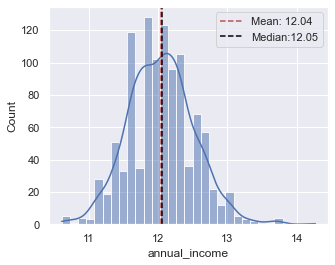

In [266]:
# Visualizing the distribution after transformation in training data
sns.histplot(x = x_train['annual_income'], kde = True)
plt.axvline(x= x_train['annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(x_train['annual_income'].mean(),2)}")
plt.axvline(x= x_train['annual_income'].median(), c='black', ls= '--', label = f"Median:{round(x_train['annual_income'].median(),2)}")
plt.legend()
plt.show()

In [267]:
# Checking the skewness
x_train['annual_income'].skew()

0.261141485597168

In [268]:
# Log transformation on test set
x_test['annual_income'] = np.log(x_test['annual_income'])

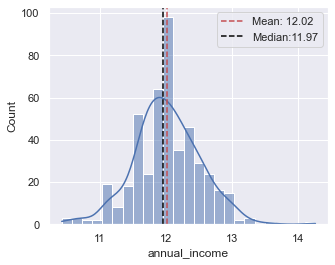

In [269]:
# Visualizing the distributon after transformation in test data
sns.histplot(x = x_test['annual_income'], kde = True)
plt.axvline(x= x_test['annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(x_test['annual_income'].mean(),2)}")
plt.axvline(x= x_test['annual_income'].median(), c='black', ls= '--', label = f"Median:{round(x_test['annual_income'].median(),2)}")
plt.legend()
plt.show()

In [270]:
x_test['annual_income'].skew()

0.103301144255719

We can observe that the distribution of data in both datasets is now almost normally distributed.

### Square Root Transformation

In [271]:
# Square Root Transformation
x_train['work_experience'] = np.sqrt(x_train['work_experience'])

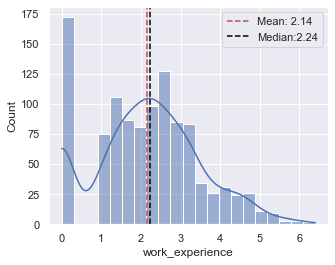

In [272]:
# Visualizing the distribution after transformation in training data
sns.histplot(x = x_train['work_experience'], kde = True)
plt.axvline(x= x_train['work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(x_train['work_experience'].mean(),2)}")
plt.axvline(x= x_train['work_experience'].median(), c='black', ls= '--', label = f"Median:{round(x_train['work_experience'].median(),2)}")
plt.legend()
plt.show()

In [273]:
# Checking the skewness
x_train['work_experience'].skew()

0.17341049769477326

In [274]:
# Square Root transformation for test data
x_test['work_experience'] = np.sqrt(x_test['work_experience'])

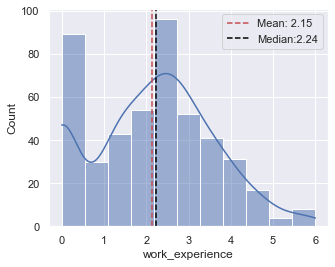

In [275]:
# Visualizing the distribution after transformation
sns.histplot(x = x_test['work_experience'], kde = True)
plt.axvline(x= x_test['work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(x_test['work_experience'].mean(),2)}")
plt.axvline(x= x_test['work_experience'].median(), c='black', ls= '--', label = f"Median:{round(x_test['work_experience'].median(),2)}")
plt.legend()
plt.show()

In [276]:
# Checking the skewness
x_test['work_experience'].skew()

0.1253692986228839

Then applied the sq root transformation on 'work_experiance' column and visualized for both training and testing dataset. we got 0.17 and 0.12 respectively which is almost normally distributed.

## Handling Imbalance with Data Resampling Techniques

Resampling can help to improve model performance in cases of imbalanced data sets. It creates new samples by selecting data points randomly from the original dataset, and these new samples can be used to estimate the population characteristics of the data or to test the performance of a machine learning model.

There are several techniques of data resampling, which can be broadly classified into two categories:


	1. **Undersampling:** This involves reducing the number of samples in the majority class to balance the class distribution with the minority class.
    Drawback of this technique is that it can result in loss of useful information.

	2. **Oversampling:** This involves increasing the number of samples in the minority class to balance the class distribution with the majority class. This technique may lead to overfitting.


### SMOTE (Synthetic Minority Over Sampling)




SMOTE is a commonly used oversampling technique. 

SMOTE works by creating synthetic samples of the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the K-Nearest Neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In this project, we're going to balance our data using the **Synthetic Minority Over-sampling Technique** (SMOTE). Unlike Random Over Sampling, SMOTE does not create exact copies of observations, but **creates new, synthetic samples** that are quite similar to the existing observations in the minority class.

In [277]:
# Defining Resampling method
smote = SMOTE(random_state =0, k_neighbors = 3)

# Fitting and resampling training data values
x_train_sm, y_train_sm = smote.fit_resample(x_train.values, y_train.values)

In [278]:
# Converting arrays to Pandas Data Structures
x_train_sm = pd.DataFrame(x_train_sm, columns= x_train.columns)
y_train_sm = pd.Series(y_train_sm)

In [279]:
# Checking the shape of resampled training set
print(x_train_sm.shape)
print(y_train_sm.shape)

(1922, 15)
(1922,)


In [280]:
# Checking resampled value counts
y_train_sm.value_counts()

0    961
1    961
dtype: int64

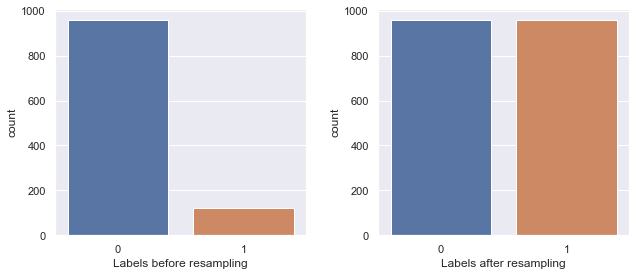

In [281]:
# Visualizing the change in target values for each category

plt.figure(figsize = (9,4))       # Setting the figure size
plt.subplot(121)
sns.countplot(x = y_train)
plt.xlabel("Labels before resampling")

plt.subplot(122)
sns.countplot(x = y_train_sm.astype('category'))
plt.xlabel("Labels after resampling")

plt.tight_layout(w_pad = 2)
plt.show()

## Feature Scaling

Feature Scaling:
	Feature scaling is a technique used to standardize the independent features present in the data in a fixed range.

-It is required because many machine  learning algorithm are sensitive to the scale of the input features.

- If the input features have diffrent scales then some featurees may dominate the others and the algorithm may fail to find the optimal solution.

- Feature scaling ensures that all features contribute equally to the algorithm's decision-making process and it can improve the accuracy and speed of the machine learning algorithm.

* There are multiple feature scaling techniques the two most frequently used are:

1. **Normalization or Min-Max Scaling:** It is the process of scaling numerical data to a range of values between 0 and 1. The new point is calculated as:

 $$ X(scaled) =\frac{\space X-\space X(min)}{\space X(max)\space -\space X(min)} $$
 
2. **Standardization:** It transforms data into a standard normal distribution with a mean of 0 and a standard deviation of 1. The scaled value ranges from -3 to +3.

 $$ X(scaled) = \frac{(X - mean)}{Std. deviation} $$
 
Here, Standard scaling technique is implemented.

In [282]:
# Initializing StandardScaler
scale = StandardScaler()

In [283]:
# Overview of training data
x_train_sm.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,0.0,0.0,1.0,2.0,11.630709,3.0,1.0,1.0,5.0,0.0,0.0,0.0,4.0,1.414214,41.0
1,1.0,0.0,0.0,0.0,12.100712,3.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,3.162278,40.0
2,0.0,0.0,1.0,0.0,11.630709,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,-0.000000,67.0
3,0.0,0.0,1.0,0.0,12.218495,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.449490,31.0
4,0.0,0.0,0.0,0.0,11.630709,3.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,1.732051,29.0


In [284]:
# Storing Numerical columns needed to be scaled in a list
cols =['annual_income', 'age', 'work_experience']

In [285]:
# Replacing original values with scaled values in training set
x_train_sm[cols] = pd.DataFrame(scale.fit_transform(x_train_sm[cols]), 
                             columns = cols, index = x_train_sm.index)

In [286]:
# Viewing the training data after scaling
x_train_sm.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,0.0,0.0,1.0,2.0,-0.957024,3.0,1.0,1.0,5.0,0.0,0.0,0.0,4.0,-0.421538,-0.343827
1,1.0,0.0,0.0,0.0,0.050522,3.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.946876,-0.432702
2,0.0,0.0,1.0,0.0,-0.957024,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,-1.528607,1.966915
3,0.0,0.0,1.0,0.0,0.303013,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.388894,-1.232574
4,0.0,0.0,0.0,0.0,-0.957024,3.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,-0.172729,-1.410324


In [287]:
# Replacing original values with scaled values in test set
x_test[cols] = pd.DataFrame(scale.transform(x_test[cols]), 
                             columns = cols, index = x_test.index)

In [288]:
# Viewing the test data
x_test.head()


,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,work_experience,age
0,1,0,0,0,-0.235729,3,1.0,1,1,1,0,0,2,1.972255,0.544920
1,0,0,1,0,0.303013,0,1.0,1,1,0,0,0,2,1.602659,-0.077203
2,1,0,1,2,-0.957024,3,1.0,1,1,0,0,0,4,0.221824,-0.077203
3,0,1,1,2,1.250168,2,1.0,1,1,0,0,0,4,0.037026,-0.965950
4,0,0,1,2,-2.358844,3,3.0,1,1,0,0,0,4,1.699028,-0.521577


# Model Building and Performance Evaluation


Building a model:

- We have done all the required prepocessing.
	
- Now we have to proceed with Machine Learning model.

- In this project we have constructed multiple machine learning models using various classification algorithms. 

- To enhance their performance, we have conducted Hyperparameter Tuning, which involves optimizing the settings of each model. 

## Performance Evaluation Metrics 

Performance Evaluation Metrics:
	There are diffrent matrics to evaluate the predictive 	performance of ML model
    
        - Accuracy Score
		- Precision	
		- Recall	
		- F1 score
		- ROC-AUC score
---
- In our case to make more accurate predictions for rejected applications which will help banks to control fraudulent activities, we need to have **increased True Positives (correctly predicted rejected applications) and minimum False Negatives (wrongly predicted actual rejected applications)**, i.e., we need to focus more on the recall score.


Some of most common evaluation metrics are discussed briefly:
1. **Accuracy:** Accuracy measures the correct predictions made by a model out of total predictions made. **Accuracy is not a reliable metric when working with imbalanced data** because even if the model predicts everything as the majority class, a higher accuracy is obtained which is actually useless.
---
2. **Precision and Recall:** 
    * Precision is the fraction of true positive results (i.e., the number of correctly identified positive instances) among all instances classified as positive. Precision measures how accurate the positive predictions are, and it is calculated as:

    $$Precision=\frac{\space True\space Positives}{\space True\space Positives+\space False\space Positives}$$
    
    * Recall is the fraction of true positive results among all actual positive instances (i.e., the number of correctly identified positive instances divided by the total number of positive instances in the dataset). Recall measures how well the model is able to identify all positive instances. It is calculated as:
    
    $$Recall=\frac{\space True\space Positives}{\space True\space Positives+\space False\space Negatives}$$

* **Precision and recall are typically inversely related, as precision increases, recall decreases and vice-versa.**
---
3. **ROC-AUC Score:** 
      * Created by plotting the true positive rate against the false positive rate at various threshold settings
      * Useful for comparing performance of different algorithms 
      * It is a more reliable metric than accuracy in case of imbalanced data.

## 1. Logistic Regression Model

First we will **train the Logistic Regression Model on the resampled dataset**, and then we will **predict the values for the test dataset which has imbalance**.

In [289]:
# Defining the Logistic Regression Model
clf1 = LogisticRegression(max_iter= 1000, C=1)

In [290]:
# Training the model on resampled data
clf1.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1, max_iter=1000)

In [291]:
# Accuracy Score for training data
clf1.score(x_train_sm, y_train_sm)

0.6103017689906347

In [292]:
# Predicting results for test data
y_pred = clf1.predict(x_test)

### Performance Evaluation of Logistic Regression Model

In [293]:
# Evaluating the baseline accuracy

accepted = [i for i in y_test if i==0]
count_accepted = len(accepted)

total_obs = len(y_test)

percentage = count_accepted/total_obs * 100
print("Baseline Accuracy: %.2f" %percentage)

Baseline Accuracy: 88.60


**This indicates that if our model simply predicts the majority class for all cases, we would achieve an accuracy rate of 88.6%. If our model's accuracy falls below this threshold, it implies that the model does not provide any significant improvement in predicting the correct outcomes compared to this baseline approach.**

With highly imbalanced data, the **AUC-ROC curve is a more reliable performance metric**, used to compare different classifiers. Moreover, the **classification report** tells us about the precision and recall of our model, and the **confusion matrix** actually shows how many rejected cases you can predict correctly. So let's evaluate the performance of our model.

In [294]:
# Accuracy score for test data
print("Accuracy Score for Logistic Regression:",accuracy_score(y_test, y_pred))

Accuracy Score for Logistic Regression: 0.610752688172043


In [295]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.74       412
           1       0.17      0.60      0.26        53

    accuracy                           0.61       465
   macro avg       0.54      0.61      0.50       465
weighted avg       0.84      0.61      0.68       465



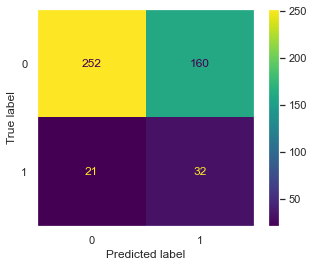

In [296]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts **192 cases of rejected applications, out of which 32 are actually rejected**. We got a **very high number of False Positives**. This is not a very good performing model, and as a result we have a very low precision score. The model also failed to correctly classify 21 actually rejected applications.

Let's also view the ROC-AUC curve for this model.

In [297]:
# Defining ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.6077120351712767


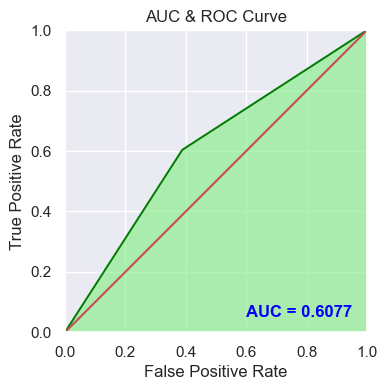

In [298]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Here, we get AUC score of 0.6077. Now, let's try to improve the performance of this model by optimizing the Hyperparamters.

### Hyperparameter tuning for Logistic Regression

In [299]:
# Initializing the list of hyperparameters to be used for various iterations
param = {'C': [0.001, 0.01, 0.1, 1, 10,15,50, 100, 1000], 
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga', 'sag']}

# Defining GridSearchCV along with 5 fold cross-validation
grid = GridSearchCV(clf1, param_grid = param, cv = 5, scoring = 'roc_auc')
grid

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [300]:
# Fitting the model in resampled training set
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [301]:
# Best hyperparameters
grid.best_params_

{'C': 1000, 'solver': 'lbfgs'}

In [302]:
# Best score for training data
grid.best_score_

0.6464435021768854

In [303]:
# Defining the best model evaluated using hyperparameter tuning
clf1_best = grid.best_estimator_

In [304]:
# Training the model
clf1_best.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1000, max_iter=1000)

In [305]:
# Predicting Results for test set
y_pred= clf1_best.predict(x_test)

### Performance Evaluation after Hyperparameter Tuning

In [306]:
# Accuracy Score
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.6043010752688172


In [307]:
# Printing the classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73       412
           1       0.17      0.62      0.26        53

    accuracy                           0.60       465
   macro avg       0.55      0.61      0.50       465
weighted avg       0.84      0.60      0.68       465



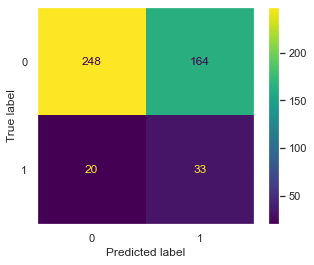

In [308]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

In [309]:
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:",auc)

AUC Score: 0.6122916285033888


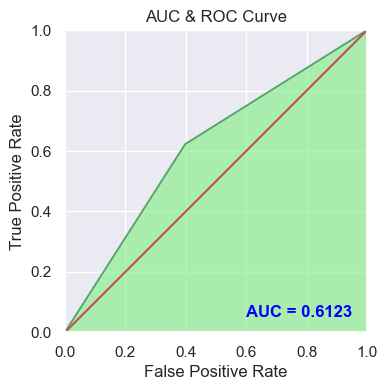

In [310]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**The number of False Positives slightly increased but there is a slight improvement in the performance after performing Hyperparameter Tuning, and we are getting an AUC score of 0.6123.**

### 2. Support Vector Classifier

In [311]:
# Defining the model
clf2 = SVC(gamma = 1)

In [312]:
# Training the model
clf2.fit(x_train_sm, y_train_sm)

SVC(gamma=1)

In [313]:
# Predicting the results on test set
y_pred =clf2.predict(x_test)

In [314]:
# Checking the Accuracy of the model
print("Accuracy Score:",clf2.score(x_test, y_test))

Accuracy Score: 0.9053763440860215


In [315]:
# Printing the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       412
           1       0.62      0.45      0.52        53

    accuracy                           0.91       465
   macro avg       0.77      0.71      0.73       465
weighted avg       0.90      0.91      0.90       465



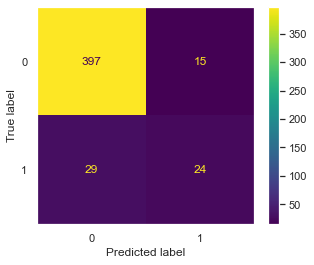

In [316]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

- Plotted the confusion matrix get to know that model predicted 39 rejected application out of which 24 actually rejected. We got much lower no of false positive this time which increased the precision. However the no of false negative are now increased and therefore recall score is not good.




#### Let's also view the ROC-AUC curve for this model.

In [317]:
# AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:",auc)

AUC Score: 0.708211210844477


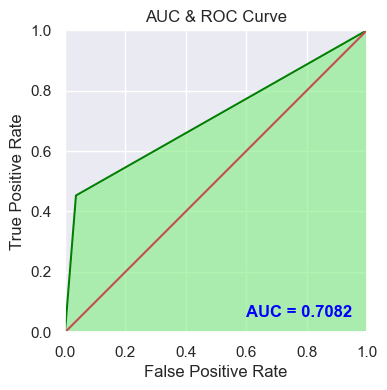

In [318]:
# Visualizing ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Let's optimize the model's performance by tuning the hyperparameters.

### Hyperparameter Tuning and Performance Evaluation for SVC

In [319]:
# Defining the hyperparameters to be tested for iterations
param= {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1,1,10,100,500,1000],
    'gamma': ['auto'],
    'decision_function_shape': ['ovr', 'ovo']
}

In [320]:
# Defining the Randomized Search with pre-defined iterations
grid = RandomizedSearchCV(clf2, param, cv=5, n_iter = 10, n_jobs =-1)

In [321]:
#Fitting the model to train set
grid.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(gamma=1), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 500, 1000],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [322]:
# Best score for a specific set of hyperparameters
grid.best_score_

0.9177949134199134

In [323]:
# Best hyperparameters from the given dictionary
grid.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'decision_function_shape': 'ovo', 'C': 100}

In [324]:
# Storing the classifier to an object
clf2_best = grid.best_estimator_

In [325]:
# Training the model
clf2_best.fit(x_train_sm, y_train_sm)

SVC(C=100, decision_function_shape='ovo', gamma='auto')

In [326]:
# Predicting the results
y_pred = clf2_best.predict(x_test)

In [327]:
# Checking the Accuracy
print("Accuracy Score:", clf2_best.score(x_test, y_test))

Accuracy Score: 0.8473118279569892


The accuracy is now decreased.

In [328]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       412
           1       0.39      0.58      0.47        53

    accuracy                           0.85       465
   macro avg       0.67      0.73      0.69       465
weighted avg       0.88      0.85      0.86       465



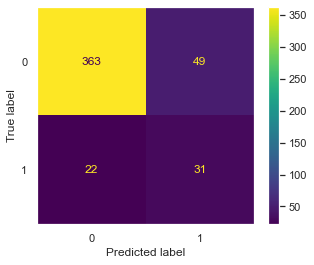

In [329]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

Plotted classification matrix. After hyperparameter tuning the model predicts total 82 cases of rejected application out of which 33 are actually rejected.
We have got a higher number of false positive compared to the previous model. The number of False Negatives are now decreased and therefore, recall score is improved.



Let's check AUC score also.

In [330]:
# Checking the AUC score
auc = roc_auc_score(y_test, y_pred)
auc

0.7329868107712035

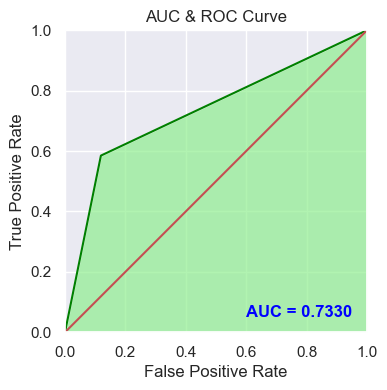

In [331]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**The model performance is slightly improved and we are now getting an AUC score of 0.7519.**

### 3. Decision Tree Classifier

In [332]:
# Defining the model 
clf3 = DecisionTreeClassifier(max_depth = 15, random_state = 10)

In [333]:
# Training the model on resampled dataset
clf3.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=15, random_state=10)

In [334]:
# Predicting the test set results
y_pred = clf3.predict(x_test)

In [335]:
# Checking the accuracy
print("Accuracy Score:",clf3.score(x_test, y_test))

Accuracy Score: 0.8473118279569892


In [336]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       412
           1       0.37      0.49      0.42        53

    accuracy                           0.85       465
   macro avg       0.65      0.69      0.67       465
weighted avg       0.87      0.85      0.86       465



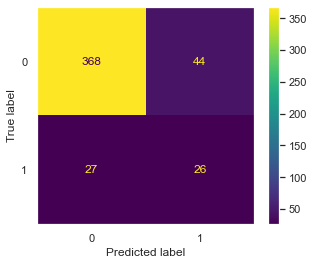

In [337]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

In this case, the model predicts **total 70 cases of rejected applications, out of which 26 are actually rejected. We got 44 False Positives this time and 27 False Negatives.**

Let's also view the ROC-AUC curve for this model.

In [338]:
# Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.6918849606154973

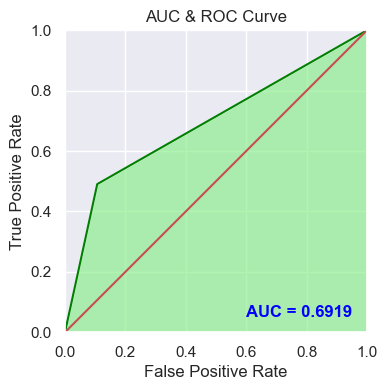

In [339]:
# Visualizing the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Hyperparameter Tuning for Decision Tree Classifier

In [340]:
# Defining the hyperparameters to be tested
params = {
    'max_depth': [5,10,15,20,25,30,50,75,80,100,200,500,1000],
    'criterion': ['gini', 'entropy']
}

In [341]:
# Storing model in GridSearchCV to test model performance at different hyperparameters
grid = GridSearchCV(clf3, params, cv=5, scoring = 'roc_auc')

In [342]:
# Training the model
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 50, 75, 80, 100,
                                       200, 500, 1000]},
             scoring='roc_auc')

In [343]:
# Best hyperparameters
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [344]:
# Storing the classifier to an object
clf3_best = grid.best_estimator_

In [345]:
# Training the model
clf3_best.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [346]:
# Predicting the test results
y_pred = clf3_best.predict(x_test)

In [347]:
# Accuracy Score
print("Accuracy:",clf3_best.score(x_test, y_test))

Accuracy: 0.8365591397849462


In [348]:
# Classification Report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90       412
           1       0.35      0.53      0.42        53

    accuracy                           0.84       465
   macro avg       0.64      0.70      0.66       465
weighted avg       0.87      0.84      0.85       465



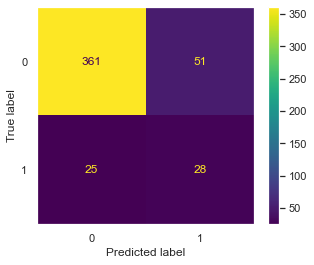

In [349]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

**A slight improvement can be seen in the True Positive values and also False Negative values are decreased slightly.**

In [350]:
# Checking the AUC score
auc = roc_auc_score(y_test, y_pred)
auc

0.7022577395127312

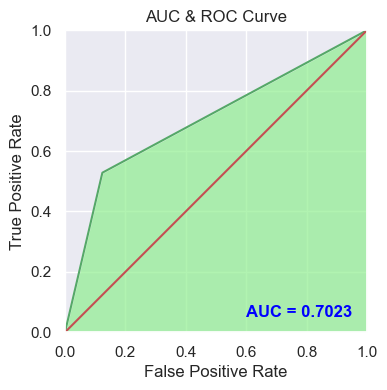

In [351]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 4. Random Forest Classifier

In [352]:
# Defining the Classifier
clf4 = RandomForestClassifier(n_estimators =15, oob_score = True,random_state = 0)

In [353]:
# Training the model
clf4.fit(x_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=15, oob_score=True, random_state=0)

In [354]:
# Predicting the results
y_pred = clf4.predict(x_test)

In [355]:
# Accuracy Score
print("Accuracy Score:",clf4.score(x_test, y_test))

Accuracy Score: 0.9311827956989247


In [356]:
# Classification Report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       412
           1       0.78      0.55      0.64        53

    accuracy                           0.93       465
   macro avg       0.86      0.76      0.80       465
weighted avg       0.93      0.93      0.93       465



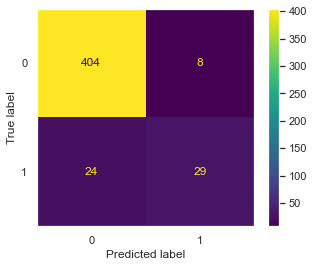

In [357]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

**The Random Forest model when trained using 15 estimators, predicts 37 rejected applications out of which 29 were actually rejected. The number of False Positive is less which increased the precision. However, the number of False Negatives is high.**

In [358]:
# Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.7638761677962997

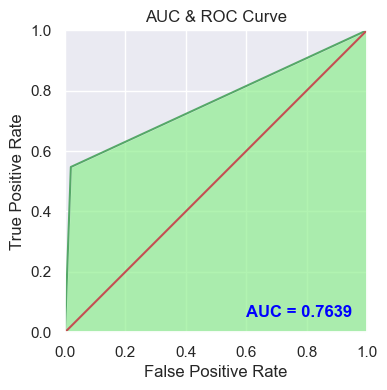

In [359]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Hyperparameter Tuning for Random Forest Classifier

In [360]:
# Defining the hyperparameters to be tested
params = {
    'n_estimators' : [5,10,15,20,30,50,80,100,500,1000],
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 12, 20, 50, 100, 500]
}

In [361]:
# Storing model in GridSearchCV to test model performance at different hyperparameters
grid = GridSearchCV(clf4, params, cv=5, n_jobs = -1, scoring ='roc_auc')

In [362]:
# Training the model
grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=15, oob_score=True,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 20, 50, 100, 500],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100, 500,
                                          1000]},
             scoring='roc_auc')

In [363]:
# Generating Best accuracy score
grid.best_score_

0.9881851398334053

In [364]:
# Best hyperparameters from the defined dictionary
grid.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}

In [365]:
# Storing the classifier with new hyperparameters
clf4_best = grid.best_estimator_

In [366]:
# Training the model
clf4_best.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=50, n_estimators=500, oob_score=True,
                       random_state=0)

In [367]:
# Predicting the results
y_pred = clf4_best.predict(x_test)

In [368]:
# Checking the Accuracy
print("Accuracy:",clf4_best.score(x_test, y_test))

Accuracy: 0.9290322580645162


In [369]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       412
           1       0.81      0.49      0.61        53

    accuracy                           0.93       465
   macro avg       0.88      0.74      0.79       465
weighted avg       0.92      0.93      0.92       465



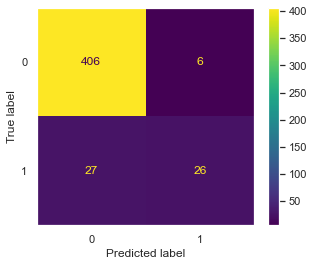

In [370]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

**It can be seen that after performing hyperparameter tuning, the predictive power of model for classifying True Positive is decreased. However, the precision score is improved.**

In [371]:
#Checking the AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.7380014654698662

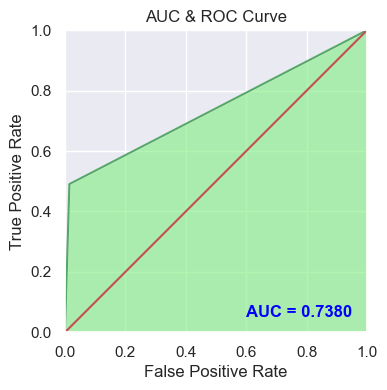

In [372]:
# Visualizing the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 5. XGBoost Classifier

In [373]:
# Initializing XGBoost Classifier
xgb = XGBClassifier(random_state =0)

In [374]:
# Fitting the model
xgb.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [375]:
# Converting 'category' datatype to 'int'(XGBoost doesn't support categorical data)
x_test[['work_phone', 'phone', 'email_id']] = x_test[['work_phone', 'phone', 'email_id']].astype(int)

In [376]:
# Predicting the test results
y_pred = xgb.predict(x_test)

In [377]:
# Checking the Accuracy
print("Accuracy:",xgb.score(x_test, y_test))

Accuracy: 0.9204301075268817


In [378]:
# Claassification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       412
           1       0.74      0.47      0.57        53

    accuracy                           0.92       465
   macro avg       0.84      0.72      0.77       465
weighted avg       0.91      0.92      0.91       465



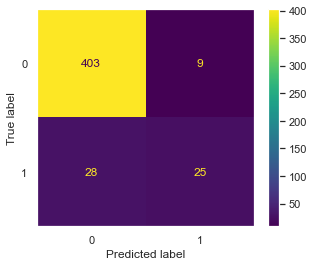

In [379]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

**Model predicts 34 rejected application, out of which 25 are actually rejected. False Negative values are high.**

In [380]:
# Checking AUC Score
auc = roc_auc_score(y_test, y_pred)
auc

0.7249267265066862

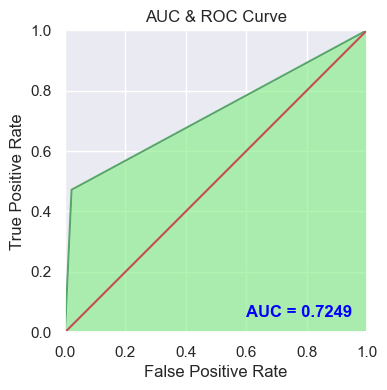

In [381]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Hyperparameter Tuning for XGBoost

In [382]:
# Defining the hyperparameters 
params = {
    'eta': [0.1,0.5,1,1.5,2,3,5,10,15,20,30,50,100],
    'gamma': [0, 0.3, 0.5, 0.8, 1, 2, 5, 10, 15,30, 50,100],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth' : [0,10,15,20,30,50,75,100,200,1000]
}

In [383]:
# Defining RandomizedSearch for faster processing with 30 iterations
grid = RandomizedSearchCV(xgb, params, n_iter = 30, n_jobs = -1, cv=5, random_state = 0, scoring = 'roc_auc')

In [384]:
# Training the model
grid.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [385]:
# Best accuracy score
grid.best_score_

0.9781415571477403

In [386]:
# New improved hyperparameters
grid.best_params_

{'max_depth': 75, 'learning_rate': 0.2, 'gamma': 0.5, 'eta': 3}

In [387]:
# Storing the new model to object
best_xgb = grid.best_estimator_

In [388]:
# Training the model
best_xgb.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=3, eval_metric=None,
              feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=75,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [389]:
# Predicting results of test set
y_pred =best_xgb.predict(x_test)

In [390]:
# Getting the accuracy score
print("Accuracy:",best_xgb.score(x_test, y_test))

Accuracy: 0.9053763440860215


In [391]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       412
           1       0.60      0.49      0.54        53

    accuracy                           0.91       465
   macro avg       0.77      0.72      0.74       465
weighted avg       0.90      0.91      0.90       465



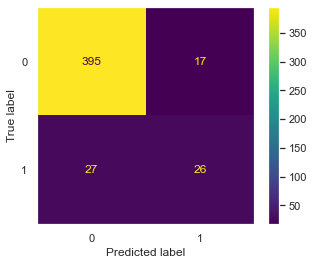

In [392]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.grid()
plt.show()

**Model performance is slightly improved and now we are getting 26 True Positives, it seems that XGBoost algorithm is trying to balance precision and recall.** Let's check the AUC score now.

In [393]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7246519509067595

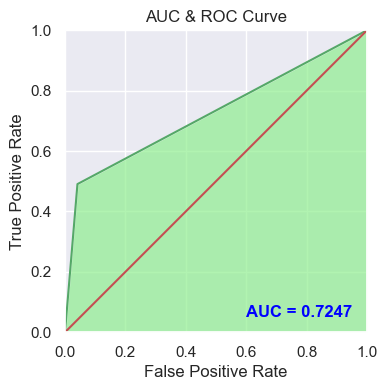

In [394]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'g')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# SUMMARY OF RESULTS

After performing all the analysis and evaluating performance of different models, here is the summary of results obtained from all the Machine learning algorithms performed here.

| Sr. No. | Algorithms                  | Accuracy | AUC Score |
| ------- | -------------------------- | -------- | --------- |
| (1)     | Logistic Regression        | 0.6043   | 0.6123    |
| (2)     | Support Vector Classifier  | 0.8516   | 0.7519    |
| (3)     | Decision Tree Classifier   | 0.8365   | 0.7023    |
| (4)     | Random Forest Classifier   | 0.9291   | 0.7380    |
| (5)     | XGBoost Classifier         | 0.9053   | 0.7247    |


**Based on the ROC-AUC score, the Support Vector Classifier outperforms the other models. However, when considering accuracy, the Random Forest Classifier performs the best.**